# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
loan_data_backup = pd.read_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan.csv')

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_9116\3735302230.py:1: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan.csv')


In [3]:
loan_data = loan_data_backup.copy()

# Explore Data

In [4]:
pd.options.display.max_columns = None

In [5]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [6]:
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 145 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    id                                          float64
 1    member_id                                   float64
 2    loan_amnt                                   int64  
 3    funded_amnt                                 int64  
 4    funded_amnt_inv                             float64
 5    term                                        object 
 6    int_rate                                    float64
 7    installment                                 float64
 8    grade                                       object 
 9    sub_grade                                   object 
 10   emp_title                                   object 
 11   emp_length                                  object 
 12   home_ownership                              object 
 13   annual_inc

# General Preprocessing

## Preprocessing few continuous variables

### Convert string to numeric

In [7]:
loan_data['emp_length'].unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [8]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year','')

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_9116\4279558398.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')


In [9]:
type(loan_data['emp_length_int'][0])

str

In [10]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [11]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [12]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [13]:
loan_data['term_int'] = loan_data['term'].str.replace(' months','')

In [14]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [15]:
type(loan_data['term_int'][0])

numpy.int64

### Convert to datetime

In [16]:
loan_data['earliest_cr_line']

0          Apr-2001
1          Jun-1987
2          Apr-2011
3          Feb-2006
4          Dec-2000
             ...   
2260663    Jan-2004
2260664    Mar-2003
2260665    Feb-1995
2260666    Jul-2003
2260667    Apr-2014
Name: earliest_cr_line, Length: 2260668, dtype: object

In [17]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'],
                                                   format = '%b-%Y')

In [18]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
loan_data['issue_date'] = pd.to_datetime(loan_data['issue_d'],
                                                   format = '%b-%Y')

In [20]:
loan_data['issue_date'].head(5)

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_date, dtype: datetime64[ns]

### Add new feature

In [21]:
pd.to_datetime('2019-01-01') - loan_data['earliest_cr_line_date']

0          6484 days
1         11537 days
2          2832 days
3          4717 days
4          6605 days
             ...    
2260663    5479 days
2260664    5785 days
2260665    8735 days
2260666    5663 days
2260667    1736 days
Name: earliest_cr_line_date, Length: 2260668, dtype: timedelta64[ns]

In [22]:
loan_data['mths_since_earliest_cr_line'] = round(
    pd.to_numeric(
        (pd.to_datetime('2019-01-01') - loan_data['earliest_cr_line_date']) 
        / np.timedelta64(1,'M') # precise conversion to month
))

In [23]:
loan_data['mths_since_issue_d'] = round(
    pd.to_numeric(
        (pd.to_datetime('2019-01-01') - loan_data['issue_date']) 
        / np.timedelta64(1,'M') # precise conversion to month
))

### Clean wrong data < 0

In [24]:
loan_data['mths_since_earliest_cr_line'].describe()

count    2.260639e+06
mean     2.286891e+02
std      9.416722e+01
min      3.800000e+01
25%      1.640000e+02
50%      2.130000e+02
75%      2.780000e+02
max      1.030000e+03
Name: mths_since_earliest_cr_line, dtype: float64

In [25]:
loan_data.loc[: ,
              ['earliest_cr_line','earliest_cr_line_date',
               'mths_since_earliest_cr_line']]\
    [loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line


In [26]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0]=\
loan_data['mths_since_earliest_cr_line'].max()

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_9116\1811927046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0]=\


In [27]:
min(loan_data['mths_since_earliest_cr_line'])

38.0

In [28]:
loan_data['earliest_cr_line_date'].describe()

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_9116\150177390.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  loan_data['earliest_cr_line_date'].describe()


count                 2260639
unique                    754
top       2004-09-01 00:00:00
freq                    15400
first     1933-03-01 00:00:00
last      2015-11-01 00:00:00
Name: earliest_cr_line_date, dtype: object

In [29]:
loan_data['mths_since_issue_d'].max()

139.0

In [30]:
loan_data['issue_date'].describe()

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_9116\2109154134.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  loan_data['issue_date'].describe()


count                 2260668
unique                    139
top       2016-03-01 00:00:00
freq                    61992
first     2007-06-01 00:00:00
last      2018-12-01 00:00:00
Name: issue_date, dtype: object

## Preprocessing few discrete variables: create dummies

In [31]:
loan_data_dummies = [
    pd.get_dummies(loan_data['grade'],prefix='grade',prefix_sep=':'),
    pd.get_dummies(loan_data['sub_grade'],prefix='sub_grade',prefix_sep=':'),    
    pd.get_dummies(loan_data['home_ownership'],prefix='home_ownership',prefix_sep=':'),    
    pd.get_dummies(loan_data['verification_status'],prefix='verification_status',prefix_sep=':'),    
    pd.get_dummies(loan_data['loan_status'],prefix='loan_status',prefix_sep=':'),    
    pd.get_dummies(loan_data['purpose'],prefix='purpose',prefix_sep=':'),    
    pd.get_dummies(loan_data['addr_state'],prefix='addr_state',prefix_sep=':'),    
    pd.get_dummies(loan_data['initial_list_status'],prefix='initial_list_status',prefix_sep=':') 
]

In [32]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [33]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [34]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis=1) 
# axix = 0 by row, axis = 1 by col

In [35]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

## Check for missing values and clean

In [36]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

id                                                                 2260668
member_id                                                          2260668
loan_amnt                                                                0
funded_amnt                                                              0
funded_amnt_inv                                                          0
term                                                                     0
int_rate                                                                 0
installment                                                              0
grade                                                                    0
sub_grade                                                                0
emp_title                                                           166969
emp_length                                                          146907
home_ownership                                                           0
annual_inc               

In [37]:
pd.options.display.max_rows = 100

### total revolving limit

In [38]:
# revolving limit: if missing, assume it is equal to funded amount of the loan
loan_data['total_rev_hi_lim'] = loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'])

In [39]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [40]:
loan_data.loc[:,['total_rev_hi_lim','funded_amnt']][loan_data['total_rev_hi_lim'].isnull()]

,total_rev_hi_lim,funded_amnt


### others

In [41]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

# Save to preprocessed data

In [42]:
loan_data.to_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data_preprocessed.csv')

# Dependent Variable 

## Default Definition: 1 for good, 0 for bad

In [4]:
loan_data['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [5]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Fully Paid                                             0.460904
Current                                                0.406824
Charged Off                                            0.115742
Late (31-120 days)                                     0.009686
In Grace Period                                        0.003960
Late (16-30 days)                                      0.001653
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000014
Name: loan_status, dtype: float64

In [6]:
# use np.where as if-statement
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin([
        'Charged Off',
        'Default',
        'Does not meet the credit policy. Status:Charged Off',
        'Late (31-120 days)']), 0, 1)

In [7]:
loan_data['good_bad'].value_counts()

1    1976324
0     284344
Name: good_bad, dtype: int64

# Save data

In [52]:
loan_data.to_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data.csv',
                 index=False)

# Load data

In [28]:
loan_data_backup = pd.read_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data.csv')

ParserError: Error tokenizing data. C error: Unknown error in IO callback

In [ ]:
loan_data = loan_data_backup.copy()

# Modeling

## Split Data

In [ ]:
X_train_data,X_test_data,y_train_data,y_test_data = train_test_split(loan_data.drop('good_bad',axis=1), 
                                                 loan_data['good_bad'],
                                                 test_size=0.2,
                                                 random_state=42)

In [72]:
# X_train.shape

In [73]:
# X_test.shape

In [74]:
# y_train.shape

In [75]:
# y_test.shape

## Preprocessing Discrete Variables

It is necessary to have only dummy variables as independent variables

### An Example: WoE and IV

In [23]:
df1 = pd.concat([X_train['grade'], y_train], axis=1)
df1.head()

,grade,good_bad
305053,D,1
50247,C,1
1630001,C,1
927626,C,1
758488,C,1


In [24]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()
# df1.groupby(['grade'], as_index = False).count()

,grade,good_bad
0,A,346505
1,B,531082
2,C,519884
3,D,259610
4,E,108133
5,F,33629
6,G,9691


In [25]:
df1 = pd.concat([df1.groupby(['grade'], as_index = False)['good_bad'].count(),
                 df1.groupby(['grade'], as_index = False)['good_bad'].mean()],
                 axis = 1)
df1 = df1.iloc[:, [0, 1, 3]]

In [27]:
df1.columns = ['grade', 'n_obs', 'prop_good']

In [29]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [30]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,346505,0.965259,0.191594
1,B,531082,0.915842,0.293653
2,C,519884,0.859809,0.287462
3,D,259610,0.801394,0.143547
4,E,108133,0.721537,0.059790
5,F,33629,0.638615,0.018595
6,G,9691,0.603859,0.005358


In [31]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']

In [32]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()

In [34]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])

In [38]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,9691,0.603859,0.005358,5852.0,3839.0,0.003701,0.016891,-1.518224
1,F,33629,0.638615,0.018595,21476.0,12153.0,0.013582,0.053472,-1.370436
2,E,108133,0.721537,0.059790,78022.0,30111.0,0.049342,0.132485,-0.987695
3,D,259610,0.801394,0.143547,208050.0,51560.0,0.131573,0.226858,-0.544764
4,C,519884,0.859809,0.287462,447001.0,72883.0,0.282687,0.320676,-0.126090
5,B,531082,0.915842,0.293653,486387.0,44695.0,0.307596,0.196653,0.447347
6,A,346505,0.965259,0.191594,334467.0,12038.0,0.211520,0.052966,1.384674


In [41]:
df1['dff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE
0,G,9691,0.603859,0.005358,5852.0,3839.0,0.003701,0.016891,-1.518224,NaN,NaN
1,F,33629,0.638615,0.018595,21476.0,12153.0,0.013582,0.053472,-1.370436,0.034756,0.147788
2,E,108133,0.721537,0.059790,78022.0,30111.0,0.049342,0.132485,-0.987695,0.082922,0.382740
3,D,259610,0.801394,0.143547,208050.0,51560.0,0.131573,0.226858,-0.544764,0.079857,0.442932
4,C,519884,0.859809,0.287462,447001.0,72883.0,0.282687,0.320676,-0.126090,0.058415,0.418673
5,B,531082,0.915842,0.293653,486387.0,44695.0,0.307596,0.196653,0.447347,0.056033,0.573438
6,A,346505,0.965259,0.191594,334467.0,12038.0,0.211520,0.052966,1.384674,0.049417,0.937327


In [42]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,G,9691,0.603859,0.005358,5852.0,3839.0,0.003701,0.016891,-1.518224,NaN,NaN,0.482686
1,F,33629,0.638615,0.018595,21476.0,12153.0,0.013582,0.053472,-1.370436,0.034756,0.147788,0.482686
2,E,108133,0.721537,0.059790,78022.0,30111.0,0.049342,0.132485,-0.987695,0.082922,0.382740,0.482686
3,D,259610,0.801394,0.143547,208050.0,51560.0,0.131573,0.226858,-0.544764,0.079857,0.442932,0.482686
4,C,519884,0.859809,0.287462,447001.0,72883.0,0.282687,0.320676,-0.126090,0.058415,0.418673,0.482686
5,B,531082,0.915842,0.293653,486387.0,44695.0,0.307596,0.196653,0.447347,0.056033,0.573438,0.482686
6,A,346505,0.965259,0.191594,334467.0,12038.0,0.211520,0.052966,1.384674,0.049417,0.937327,0.482686


### Automating Calculations: WoE & IV

In [ ]:
def woe_discrete(df, x, y):
    df = pd.concat([df[x], y], axis = 1)
    df = pd.concat([
        df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
        df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()
        ], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['dff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [46]:
df_temp = woe_discrete(X_test, 'grade', y_test)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,G,2477,0.607994,0.005478,1506.0,971.0,0.003812,0.017016,-1.495984,NaN,NaN,0.477452
1,F,8171,0.642271,0.018072,5248.0,2923.0,0.013284,0.051222,-1.349633,0.034278,0.146351,0.477452
2,E,27506,0.722206,0.060836,19865.0,7641.0,0.050282,0.133900,-0.979439,0.079935,0.370194,0.477452
3,D,64814,0.798331,0.143351,51743.0,13071.0,0.130972,0.229055,-0.558976,0.076125,0.420462,0.477452
4,C,130169,0.860366,0.287899,111993.0,18176.0,0.283477,0.318514,-0.116535,0.062036,0.442441,0.477452
5,B,132475,0.915222,0.292999,121244.0,11231.0,0.306893,0.196811,0.444258,0.054856,0.560793,0.477452
6,A,86522,0.964726,0.191364,83470.0,3052.0,0.211280,0.053483,1.373821,0.049504,0.929563,0.477452


### Visualizing Results

In [ ]:
# overwrite the default maplotlib look with seaborn
sns.set()

In [ ]:
def plot_by_woe(df_woe, rotation_of_x_axis_labels = 0):
    x = np.array(df_woe.iloc[:, 0].apply(str)) # turn into text strings in ndarray
    y = df_woe['WoE']
    # formatting
    plt.figure(figsize = (16, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('WoE by ' + df_woe.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

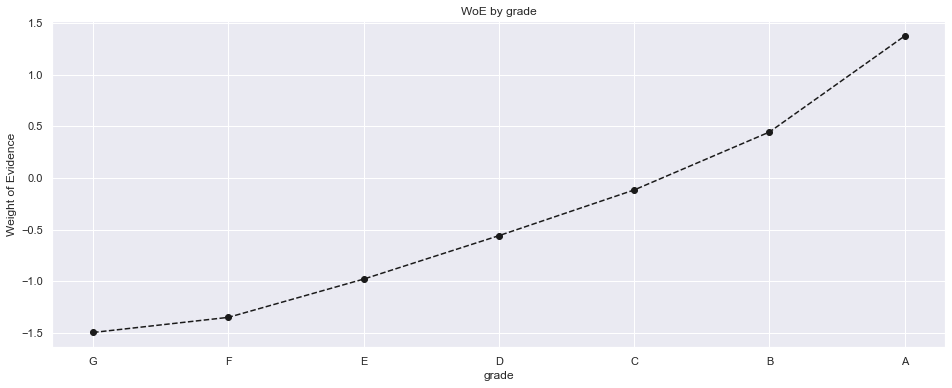

In [57]:
plot_by_woe(df_temp)

### Creating Dummy Variables

In [78]:
X_train = X_train_data
y_train = y_train_data
# X_test = X_test_data
# y_test = y_test_data

#### home ownership

In [10]:
df_temp = woe_discrete(X_train, 'home_ownership', y_train)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,OTHER,142,0.809859,0.000079,115.0,27.0,0.000073,0.000119,-0.490701,NaN,NaN,0.024684
1,RENT,715761,0.853880,0.395769,611174.0,104587.0,0.386512,0.460170,-0.174433,0.044021,0.316267,0.024684
2,NONE,43,0.860465,0.000024,37.0,6.0,0.000023,0.000026,-0.120637,0.006585,0.053796,0.024684
3,OWN,202560,0.874358,0.112002,177110.0,25450.0,0.112006,0.111977,0.000259,0.013893,0.120897,0.024684
4,MORTGAGE,889204,0.890740,0.491671,792050.0,97154.0,0.500900,0.427466,0.158531,0.016382,0.158272,0.024684
5,ANY,824,0.933252,0.000456,769.0,55.0,0.000486,0.000242,0.697962,0.042512,0.539431,0.024684


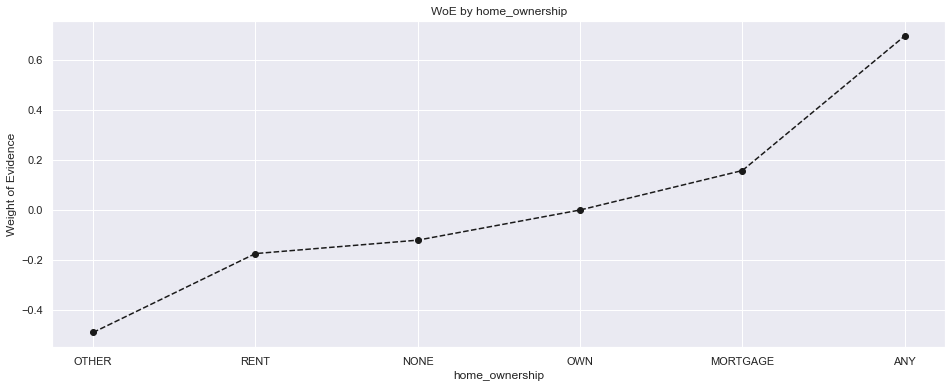

In [13]:
plot_by_woe(df_temp)

In [92]:
X_train['home_ownership:RENT_OTHER_NONE_ANY'] = sum([X_train['home_ownership:RENT'],
                                                    X_train['home_ownership:OTHER'],
                                                    X_train['home_ownership:NONE'],
                                                    X_train['home_ownership:ANY']])

#### address state

In [15]:
df_temp = woe_discrete(X_train, 'addr_state', y_train)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,IA,12,0.750000,0.000007,9.0,3.0,0.000006,0.000013,-0.841183,NaN,NaN,0.014338
1,AL,21792,0.847742,0.012050,18474.0,3318.0,0.011683,0.014599,-0.222794,0.097742,0.618390,0.014338
2,AR,13572,0.850796,0.007504,11547.0,2025.0,0.007302,0.008910,-0.198940,0.003053,0.023854,0.014338
3,MS,10065,0.851863,0.005565,8574.0,1491.0,0.005422,0.006560,-0.190508,0.001067,0.008431,0.014338
4,OK,16515,0.853224,0.009132,14091.0,2424.0,0.008911,0.010665,-0.179679,0.001361,0.010830,0.014338
5,LA,20517,0.853634,0.011345,17514.0,3003.0,0.011076,0.013213,-0.176407,0.000409,0.003272,0.014338
6,NV,26116,0.857941,0.014440,22406.0,3710.0,0.014170,0.016324,-0.141499,0.004308,0.034908,0.014338
7,NM,9623,0.860127,0.005321,8277.0,1346.0,0.005234,0.005922,-0.123452,0.002185,0.018046,0.014338
8,HI,8558,0.861767,0.004732,7375.0,1183.0,0.004664,0.005205,-0.109753,0.001640,0.013699,0.014338
9,NY,149066,0.862309,0.082424,128541.0,20525.0,0.081290,0.090308,-0.105192,0.000543,0.004562,0.014338


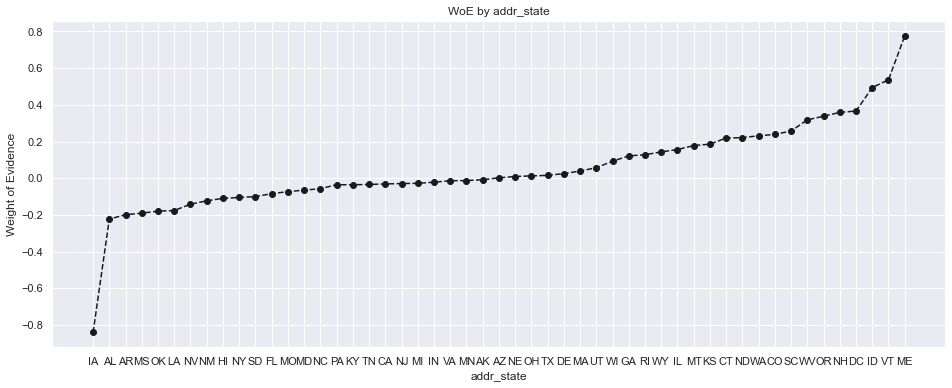

In [16]:
plot_by_woe(df_temp)

state ND is missing in our data. add it as a dummy variable in case it is used.

In [93]:
if ['addr_state:ND'] in X_train.columns.values:
    pass
else:
    X_train['addr_state:ND'] = 0

In [22]:
#plot_by_woe(df_temp.iloc[1: -2, :])

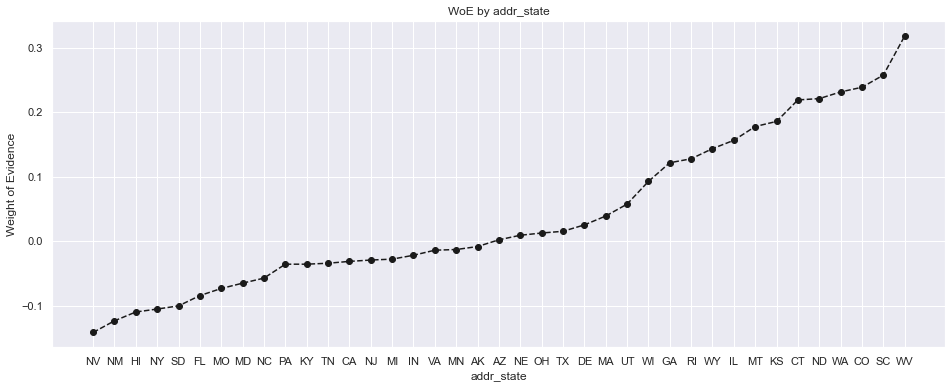

In [20]:
plot_by_woe(df_temp.iloc[6: -6, :])

In [94]:
X_train['addr_state:ND_IA_AL_AR_MS_OK_LA'] = sum([
                           X_train['addr_state:ND'],
                           X_train['addr_state:IA'],
                           X_train['addr_state:AL'],
                           X_train['addr_state:AR'],
                           X_train['addr_state:MS'],
                           X_train['addr_state:OK'],
                           X_train['addr_state:LA']])
X_train['addr_state:NV_NM_HI_SD'] = sum([
                           X_train['addr_state:NV'],
                           X_train['addr_state:NM'],
                           X_train['addr_state:HI'],
                           X_train['addr_state:SD']])
X_train['addr_state:MO_MD_NC'] = sum([
                           X_train['addr_state:MO'],
                           X_train['addr_state:MD'],
                           X_train['addr_state:NC']])
X_train['addr_state:PA_KY_TN'] = sum([
                           X_train['addr_state:PA'],
                           X_train['addr_state:KY'],
                           X_train['addr_state:TN']])
X_train['addr_state:NJ_MI_IN'] = sum([
                           X_train['addr_state:NJ'],
                           X_train['addr_state:MI'],
                           X_train['addr_state:IN']])
X_train['addr_state:VA_MN_AK'] = sum([
                           X_train['addr_state:VA'],
                           X_train['addr_state:MN'],
                           X_train['addr_state:AK']])
X_train['addr_state:AZ_NE_OH'] = sum([
                           X_train['addr_state:AZ'],
                           X_train['addr_state:NE'],
                           X_train['addr_state:OH']])
X_train['addr_state:DE_MA_UT_WI'] = sum([
                           X_train['addr_state:DE'],
                           X_train['addr_state:MA'],
                           X_train['addr_state:UT'],
                           X_train['addr_state:WI']])
X_train['addr_state:GA_RI_WY_IL_MT_KS'] = sum([
                           X_train['addr_state:GA'],
                           X_train['addr_state:RI'],
                           X_train['addr_state:WY'],
                           X_train['addr_state:IL'],
                           X_train['addr_state:MT'],
                           X_train['addr_state:KS']])
X_train['addr_state:CT_ND_WA_CO_SC'] = sum([
                           X_train['addr_state:CT'],
                           X_train['addr_state:ND'],
                           X_train['addr_state:WA'],
                           X_train['addr_state:CO'],
                           X_train['addr_state:SC']])
X_train['addr_state:WV_OR_NH_DC_ID_VT_ME'] = sum([
                           X_train['addr_state:WV'],
                           X_train['addr_state:OR'],
                           X_train['addr_state:NH'],
                           X_train['addr_state:DC'],
                           X_train['addr_state:ID'],
                           X_train['addr_state:VT'],
                           X_train['addr_state:ME']])

## Preprocessing Continuous Variables

### Automating Calculations and Visualizing Results

In [ ]:
def woe_ordered_continuous(df, x, y):
    df = pd.concat([df[x], y], axis = 1)
    df = pd.concat([
        df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
        df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()
        ], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['dff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### Creating Dummy Variables

#### term

In [25]:
df_temp = woe_ordered_continuous(X_train, 'term_int', y_train)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,36,1288079,0.892962,0.712223,1150206.0,137873.0,0.727401,0.606624,0.181568,NaN,NaN,0.066225
1,60,520455,0.828216,0.287777,431049.0,89406.0,0.272599,0.393376,-0.366762,0.064747,0.548329,0.066225


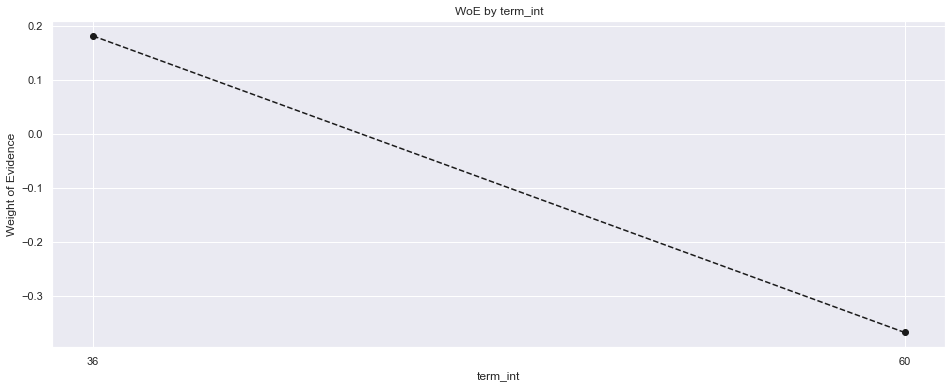

In [26]:
plot_by_woe(df_temp)

In [95]:
X_train['term:36'] = np.where((X_train['term_int'] == 36), 1, 0)
X_train['term:60'] = np.where((X_train['term_int'] == 60), 1, 0)

#### employment length

In [33]:
df_temp = woe_ordered_continuous(X_train, 'emp_length_int', y_train)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,0.0,269712,0.863873,0.149133,232997.0,36715.0,0.147349,0.161542,-0.091956,NaN,NaN,0.004262
1,1.0,118648,0.869024,0.065605,103108.0,15540.0,0.065206,0.068374,-0.047436,0.005151,0.044519,0.004262
2,2.0,163041,0.874872,0.090151,142640.0,20401.0,0.090207,0.089762,0.004944,0.005848,0.052380,0.004262
3,3.0,144605,0.873794,0.079957,126355.0,18250.0,0.079908,0.080298,-0.004865,0.001078,0.009810,0.004262
4,4.0,109209,0.876604,0.060385,95733.0,13476.0,0.060542,0.059293,0.020857,0.002809,0.025722,0.004262
5,5.0,111790,0.874202,0.061812,97727.0,14063.0,0.061803,0.061875,-0.001165,0.002402,0.022022,0.004262
6,6.0,82062,0.874851,0.045375,71792.0,10270.0,0.045402,0.045187,0.004750,0.000649,0.005915,0.004262
7,7.0,74021,0.868470,0.040929,64285.0,9736.0,0.040654,0.042837,-0.052300,0.006381,0.057050,0.004262
8,8.0,73442,0.861864,0.040609,63297.0,10145.0,0.040030,0.044637,-0.108939,0.006606,0.056639,0.004262
9,9.0,63573,0.866421,0.035152,55081.0,8492.0,0.034834,0.037364,-0.070115,0.004557,0.038823,0.004262


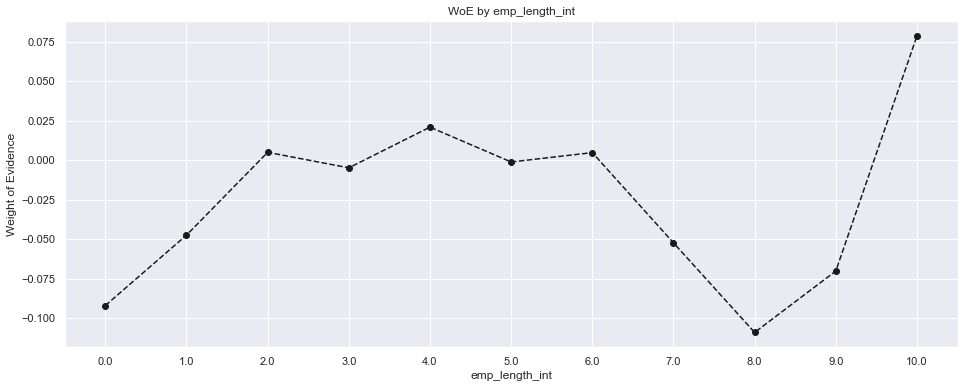

In [34]:
plot_by_woe(df_temp)

In [96]:
X_train['emp_length:0'] = np.where((X_train['emp_length_int'].isin([0])), 1, 0)
X_train['emp_length:1'] = np.where((X_train['emp_length_int'].isin([1])), 1, 0)
X_train['emp_length:2-6'] = np.where((X_train['emp_length_int'].isin(range(2, 7))), 1, 0)
X_train['emp_length:7-9'] = np.where((X_train['emp_length_int'].isin(range(7, 10))), 1, 0)
X_train['emp_length:10'] = np.where((X_train['emp_length_int'].isin([10])), 1, 0)

#### months since issue date

In [54]:
X_train['mths_since_issue_d_factor'] = pd.cut(X_train['mths_since_issue_d'], 50 )

In [55]:
df_temp = woe_ordered_continuous(X_train, 'mths_since_issue_d_factor', y_train)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,"(0.862, 3.76]",102884,0.995655,0.056888,102437.0,447.0,0.064782,0.001967,3.494649,NaN,NaN,0.540132
1,"(3.76, 6.52]",102605,0.983724,0.056734,100935.0,1670.0,0.063832,0.007348,2.161857,0.011931,1.332792,0.540132
2,"(6.52, 9.28]",104563,0.961726,0.057816,100561.0,4002.0,0.063596,0.017608,1.284174,0.021998,0.877683,0.540132
3,"(9.28, 12.04]",86368,0.945686,0.047756,81677.0,4691.0,0.051653,0.020640,0.917331,0.016041,0.366844,0.540132
4,"(12.04, 14.8]",64324,0.928394,0.035567,59718.0,4606.0,0.037766,0.020266,0.622478,0.017292,0.294853,0.540132
5,"(14.8, 17.56]",97239,0.908185,0.053767,88311.0,8928.0,0.055849,0.039282,0.351876,0.020209,0.270601,0.540132
6,"(17.56, 20.32]",92057,0.890839,0.050901,82008.0,10049.0,0.051863,0.044214,0.159548,0.017346,0.192329,0.540132
7,"(20.32, 23.08]",75549,0.881613,0.041774,66605.0,8944.0,0.042122,0.039353,0.068001,0.009226,0.091547,0.540132
8,"(23.08, 25.84]",54361,0.863266,0.030058,46928.0,7433.0,0.029678,0.032704,-0.097111,0.018347,0.165112,0.540132
9,"(25.84, 28.6]",76286,0.854626,0.042181,65196.0,11090.0,0.041231,0.048795,-0.168441,0.008640,0.071331,0.540132


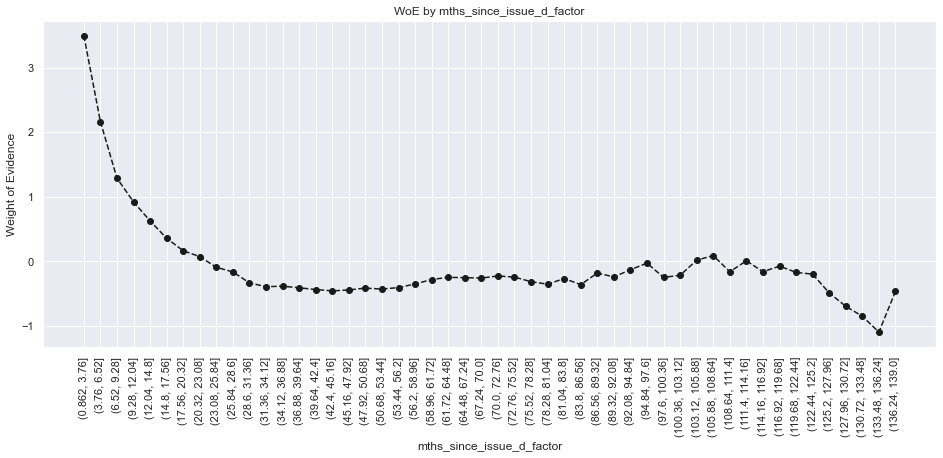

In [65]:
plot_by_woe(df_temp, 90)

In [64]:
#plot_by_woe(df_temp.iloc[15: , :], 90)

In [97]:
X_train['mths_since_issue_d:<4'] = np.where((X_train['mths_since_issue_d'].isin(range(4))), 1, 0)
X_train['mths_since_issue_d:4-6'] = np.where((X_train['mths_since_issue_d'].isin(range(4,7))), 1, 0)
X_train['mths_since_issue_d:7-9'] = np.where((X_train['mths_since_issue_d'].isin(range(7,10))), 1, 0)
X_train['mths_since_issue_d:10-12'] = np.where((X_train['mths_since_issue_d'].isin(range(10,13))), 1, 0)
X_train['mths_since_issue_d:13-14'] = np.where((X_train['mths_since_issue_d'].isin(range(13,15))), 1, 0)
X_train['mths_since_issue_d:15-17'] = np.where((X_train['mths_since_issue_d'].isin(range(15,18))), 1, 0)
X_train['mths_since_issue_d:18-23'] = np.where((X_train['mths_since_issue_d'].isin(range(18,24))), 1, 0)
X_train['mths_since_issue_d:24-28'] = np.where((X_train['mths_since_issue_d'].isin(range(24,29))), 1, 0)
X_train['mths_since_issue_d:29-58'] = np.where((X_train['mths_since_issue_d'].isin(range(29,59))), 1, 0)
X_train['mths_since_issue_d:59-75'] = np.where((X_train['mths_since_issue_d'].isin(range(59,76))), 1, 0)
X_train['mths_since_issue_d:76-86'] = np.where((X_train['mths_since_issue_d'].isin(range(76,87))), 1, 0)
X_train['mths_since_issue_d:87-125'] = np.where((X_train['mths_since_issue_d'].isin(range(87,126))), 1, 0)
X_train['mths_since_issue_d:>126'] = np.where((X_train['mths_since_issue_d'].isin(range(126,
                                                        int(X_train['mths_since_issue_d'].max())))), 1, 0)

#### interest rate

In [98]:
df_prep_temp = X_train
df_prep_temp['int_rate_factor'] = pd.cut(df_prep_temp['int_rate'], 50)

In [67]:
df_temp = woe_ordered_continuous(df_prep_temp, 'int_rate_factor', y_train)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,"(5.284, 5.824]",45407,0.979519,0.025107,44477.0,930.0,0.028128,0.004092,1.927747,NaN,NaN,0.472031
1,"(5.824, 6.337]",39268,0.982785,0.021713,38592.0,676.0,0.024406,0.002974,2.104811,0.003266,0.177064,0.472031
2,"(6.337, 6.851]",41392,0.975478,0.022887,40377.0,1015.0,0.025535,0.004466,1.743576,0.007307,0.361236,0.472031
3,"(6.851, 7.364]",76394,0.965442,0.042241,73754.0,2640.0,0.046643,0.011616,1.390161,0.010036,0.353415,0.472031
4,"(7.364, 7.878]",43531,0.962096,0.024070,41881.0,1650.0,0.026486,0.007260,1.294261,0.003346,0.095899,0.472031
5,"(7.878, 8.392]",110343,0.936670,0.061012,103355.0,6988.0,0.065363,0.030746,0.754179,0.025426,0.540082,0.472031
6,"(8.392, 8.905]",29804,0.951315,0.016480,28353.0,1451.0,0.017931,0.006384,1.032684,0.014645,0.278505,0.472031
7,"(8.905, 9.419]",37307,0.900582,0.020628,33598.0,3709.0,0.021248,0.016319,0.263908,0.050734,0.768776,0.472031
8,"(9.419, 9.932]",79775,0.938439,0.044110,74864.0,4911.0,0.047345,0.021608,0.784400,0.037858,0.520491,0.472031
9,"(9.932, 10.446]",63096,0.933736,0.034888,58915.0,4181.0,0.037258,0.018396,0.705749,0.004703,0.078650,0.472031


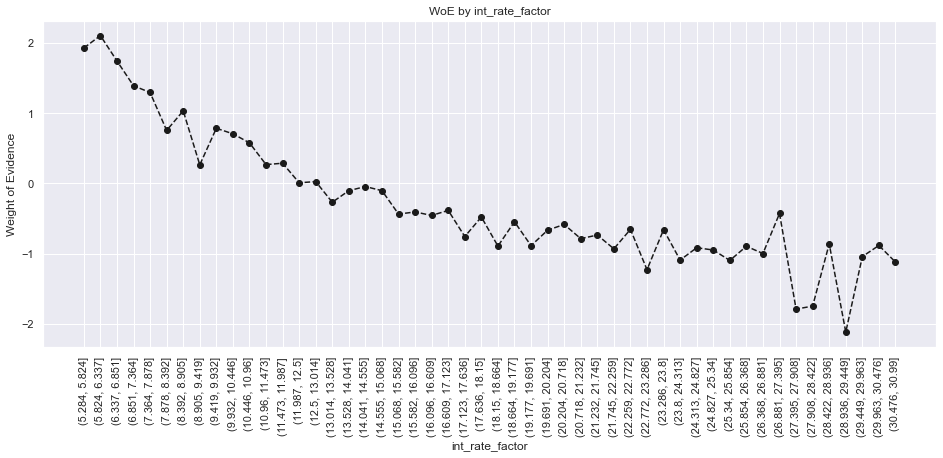

In [73]:
plot_by_woe(df_temp, 90)

In [99]:
X_train['int_rate:<7.878'] = np.where((X_train['int_rate'] <= 7.878), 1, 0)
X_train['int_rate:7.878-10.96'] = np.where(((X_train['int_rate'] > 7.878) & (X_train['int_rate'] <= 10.96)), 1, 0)
X_train['int_rate:10.96-13.014'] = np.where(((X_train['int_rate'] > 10.96) & (X_train['int_rate'] <= 13.014)), 1, 0)
X_train['int_rate:13.014-15.068'] = np.where(((X_train['int_rate'] > 13.014) & (X_train['int_rate'] <= 15.068)), 1, 0)
X_train['int_rate:15.068-20.718'] = np.where(((X_train['int_rate'] > 15.068) & (X_train['int_rate'] <= 20.718)), 1, 0)
X_train['int_rate:>20.718'] = np.where((X_train['int_rate'] > 20.718), 1, 0)

#### funded amount

In [ ]:
df_prep_temp = X_train
df_prep_temp['funded_amnt_factor'] = pd.cut(df_prep_temp['funded_amnt'], 50)

In [100]:
df_temp = woe_ordered_continuous(df_prep_temp, 'funded_amnt_factor', y_train)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,"(460.5, 1290.0]",2828,0.914427,0.006255,2586.0,242.0,0.006546,0.004241,0.434060,NaN,NaN,0.042764
1,"(1290.0, 2080.0]",6472,0.905284,0.014314,5859.0,613.0,0.014830,0.010742,0.322500,0.009143,0.111561,0.042764
2,"(2080.0, 2870.0]",5629,0.902647,0.012450,5081.0,548.0,0.012861,0.009603,0.292119,0.002637,0.030381,0.042764
3,"(2870.0, 3660.0]",12485,0.896996,0.027613,11199.0,1286.0,0.028347,0.022536,0.229418,0.005651,0.062700,0.042764
4,"(3660.0, 4450.0]",9815,0.893734,0.021708,8772.0,1043.0,0.022204,0.018277,0.194594,0.003262,0.034824,0.042764
5,"(4450.0, 5240.0]",23491,0.895875,0.051956,21045.0,2446.0,0.053269,0.042863,0.217340,0.002141,0.022745,0.042764
6,"(5240.0, 6030.0]",21098,0.892881,0.046663,18838.0,2260.0,0.047683,0.039604,0.185642,0.002994,0.031698,0.042764
7,"(6030.0, 6820.0]",6836,0.870099,0.015119,5948.0,888.0,0.015056,0.015561,-0.033031,0.022781,0.218673,0.042764
8,"(6820.0, 7610.0]",15698,0.884635,0.034720,13887.0,1811.0,0.035151,0.031736,0.102205,0.014536,0.135235,0.042764
9,"(7610.0, 8400.0]",19935,0.879960,0.044091,17542.0,2393.0,0.044402,0.041935,0.057181,0.004675,0.045024,0.042764


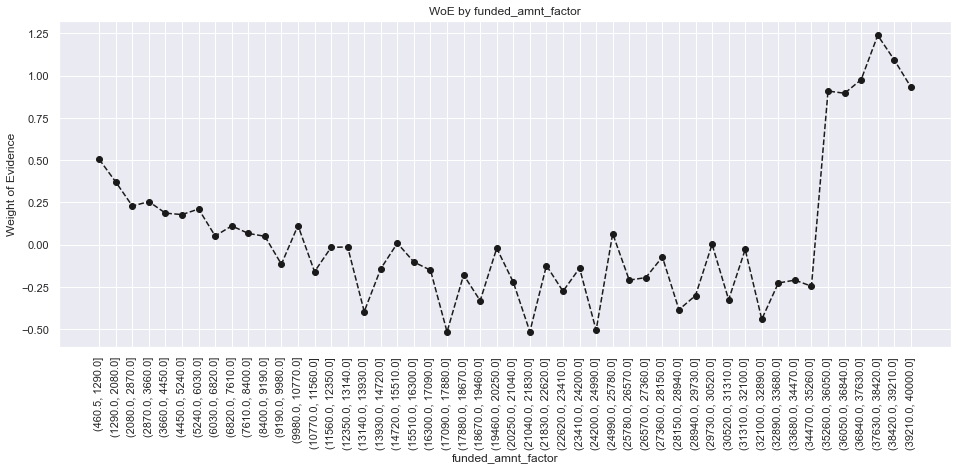

In [78]:
plot_by_woe(df_temp, 90)

too much variation. drop this feature so no need to create dummies

#### annual income

In [24]:
# X_train['annual_inc_factor'] = pd.cut(X_train['annual_inc'], 100)

In [56]:
# df_temp = woe_ordered_continuous(X_train, 'annual_inc_factor', y_train)
# df_temp

In [47]:
df_prep_temp = X_train.loc[X_train['annual_inc'] <= 252573.72,:]

In [48]:
df_prep_temp['annual_inc_factor'] = pd.cut(df_prep_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_prep_temp, 'annual_inc_factor', y_train[df_prep_temp.index])
df_temp

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_18964\2535992355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep_temp['annual_inc_factor'] = pd.cut(df_prep_temp['annual_inc'], 50)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,"(-252.5, 5050.0]",2042,0.945152,0.001142,1930.0,112.0,0.001235,0.000496,0.912301,NaN,NaN,0.031832
1,"(5050.0, 10100.0]",2738,0.880205,0.001531,2410.0,328.0,0.001543,0.001453,0.059893,0.064947,0.852408,0.031832
2,"(10100.0, 15150.0]",9951,0.859713,0.005566,8555.0,1396.0,0.005476,0.006184,-0.121571,0.020492,0.181464,0.031832
3,"(15150.0, 20200.0]",19970,0.850426,0.011170,16983.0,2987.0,0.010872,0.013233,-0.196532,0.009287,0.074962,0.031832
4,"(20200.0, 25250.0]",39467,0.849089,0.022075,33511.0,5956.0,0.021452,0.026385,-0.207001,0.001337,0.010469,0.031832
5,"(25250.0, 30300.0]",63202,0.844309,0.035350,53362.0,9840.0,0.034159,0.043592,-0.243832,0.004780,0.036831,0.031832
6,"(30300.0, 35350.0]",79981,0.848789,0.044735,67887.0,12094.0,0.043457,0.053577,-0.209341,0.004480,0.034492,0.031832
7,"(35350.0, 40400.0]",113036,0.853153,0.063223,96437.0,16599.0,0.061733,0.073534,-0.174928,0.004364,0.034412,0.031832
8,"(40400.0, 45450.0]",112514,0.854445,0.062931,96137.0,16377.0,0.061541,0.072551,-0.164579,0.001292,0.010349,0.031832
9,"(45450.0, 50500.0]",131629,0.860358,0.073623,113248.0,18381.0,0.072495,0.081429,-0.116213,0.005913,0.048366,0.031832


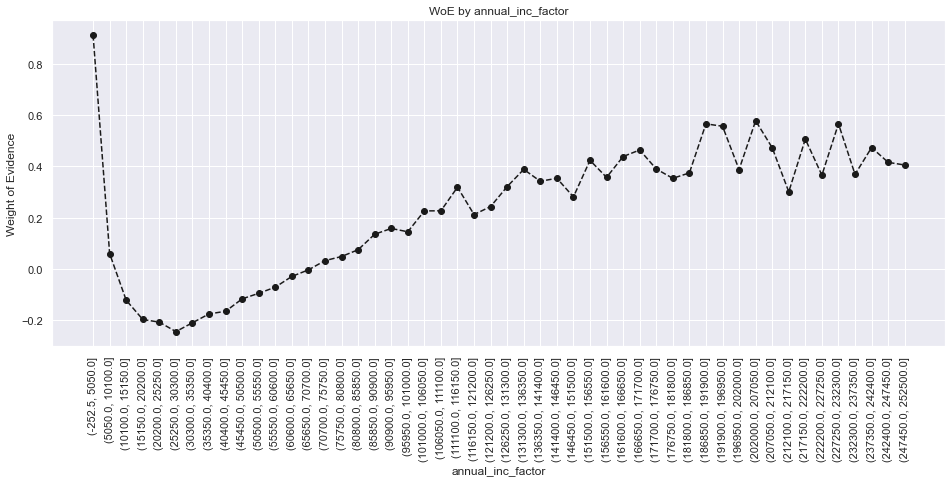

In [54]:
plot_by_woe(df_temp, 90)

In [101]:
X_train['annual_inc:<10k'] = np.where((X_train['annual_inc'] <= 10100), 1, 0)
X_train['annual_inc:10k-45k'] = np.where(((X_train['annual_inc'] > 10100) & (X_train['annual_inc'] <= 45450.0)), 1, 0)
X_train['annual_inc:45k-55k'] = np.where(((X_train['annual_inc'] > 45450) & (X_train['annual_inc'] <= 55550)), 1, 0)
X_train['annual_inc:55k-60k'] = np.where(((X_train['annual_inc'] > 55550) & (X_train['annual_inc'] <= 60600)), 1, 0)
X_train['annual_inc:60k-70k'] = np.where(((X_train['annual_inc'] > 60600) & (X_train['annual_inc'] <= 70700)), 1, 0)
X_train['annual_inc:70k-85k'] = np.where(((X_train['annual_inc'] > 70700) & (X_train['annual_inc'] <= 85850)), 1, 0)
X_train['annual_inc:85k-101k'] = np.where(((X_train['annual_inc'] > 85850) & (X_train['annual_inc'] <= 101000)), 1, 0)
X_train['annual_inc:101k-111k'] = np.where(((X_train['annual_inc'] > 101000) & (X_train['annual_inc'] <= 111100)), 1, 0)
X_train['annual_inc:111k-131k'] = np.where(((X_train['annual_inc'] > 111100) & (X_train['annual_inc'] <= 131300)), 1, 0)
X_train['annual_inc:131k-161k'] = np.where(((X_train['annual_inc'] > 131300) & (X_train['annual_inc'] <= 161600)), 1, 0)
X_train['annual_inc:>161k'] = np.where((X_train['annual_inc'] > 161600), 1, 0)

#### months since last delinquency

In [57]:
df_prep_temp = X_train[pd.notnull(X_train['mths_since_last_delinq'])]

In [58]:
df_prep_temp['mths_since_last_delinq_factor'] = pd.cut(df_prep_temp['mths_since_last_delinq'],50)

C:\Users\温泉小鱼汤\AppData\Local\Temp\ipykernel_18964\4012289769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep_temp['mths_since_last_delinq_factor'] = pd.cut(df_prep_temp['mths_since_last_delinq'],50)


In [59]:
df_temp = woe_ordered_continuous(df_prep_temp, 'mths_since_last_delinq_factor', y_train[df_prep_temp.index])
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,"(-0.195, 3.9]",26204,0.847619,0.029734,22211.0,3993.0,0.029064,0.034103,-0.159869,NaN,NaN,inf
1,"(3.9, 7.8]",58907,0.856027,0.066842,50426.0,8481.0,0.065985,0.072433,-0.093235,0.008409,0.066634,inf
2,"(7.8, 11.7]",62507,0.860032,0.070927,53758.0,8749.0,0.070345,0.074722,-0.060361,0.004004,0.032875,inf
3,"(11.7, 15.6]",64902,0.858957,0.073644,55748.0,9154.0,0.072949,0.078181,-0.069263,0.001075,0.008902,inf
4,"(15.6, 19.5]",60274,0.865697,0.068393,52179.0,8095.0,0.068279,0.069137,-0.012480,0.006740,0.056783,inf
5,"(19.5, 23.4]",58195,0.869628,0.066034,50608.0,7587.0,0.066223,0.064798,0.021760,0.003931,0.034240,inf
6,"(23.4, 27.3]",57506,0.868083,0.065252,49920.0,7586.0,0.065323,0.064789,0.008204,0.001545,0.013556,inf
7,"(27.3, 31.2]",54412,0.866868,0.061741,47168.0,7244.0,0.061722,0.061869,-0.002371,0.001216,0.010575,inf
8,"(31.2, 35.1]",51456,0.872707,0.058387,44906.0,6550.0,0.058762,0.055941,0.049193,0.005839,0.051564,inf
9,"(35.1, 39.0]",49172,0.871167,0.055796,42837.0,6335.0,0.056055,0.054105,0.035399,0.001540,0.013794,inf


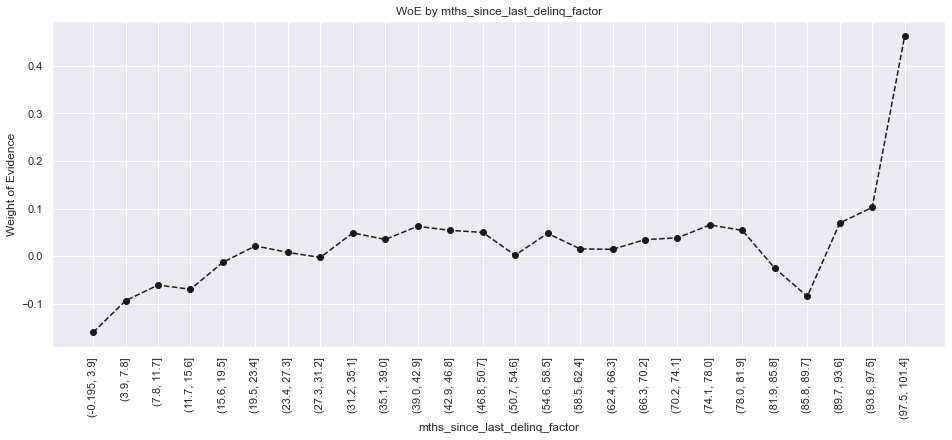

In [70]:
plot_by_woe(df_temp.iloc[:-24,:], 90)

In [69]:
#plot_by_woe(df_temp, 90)

In [102]:
X_train['mths_since_last_delinq:Missing'] = np.where((X_train['mths_since_last_delinq'].isnull()), 1, 0)
X_train['mths_since_last_delinq:0-3'] = np.where(((X_train['mths_since_last_delinq'] >= 0) & (X_train['mths_since_last_delinq'] < 4)), 1, 0)
X_train['mths_since_last_delinq:4-15'] = np.where(((X_train['mths_since_last_delinq'] >= 4) & (X_train['mths_since_last_delinq'] < 16)), 1, 0)
X_train['mths_since_last_delinq:16-31'] = np.where(((X_train['mths_since_last_delinq'] >= 16) & (X_train['mths_since_last_delinq'] < 32)), 1, 0)
X_train['mths_since_last_delinq:32-81'] = np.where(((X_train['mths_since_last_delinq'] >= 32) & (X_train['mths_since_last_delinq'] < 82)), 1, 0)
X_train['mths_since_last_delinq:>82'] = np.where((X_train['mths_since_last_delinq'] >= 82), 1, 0)

## Preprocessing Test Dataset

#### output the train set

In [90]:
X_train_output = X_train
y_train_output = y_train

#### preprocess the test set

In [91]:
# X_train = X_train_data
# y_train = y_train_data
X_train = X_test_data
y_train = y_test_data

Nest Step: Rerun X_train codes from section 3.2.4 creating dummy variables to 3.3.2.7

In [103]:
X_test_output = X_train
y_test_output = y_train

#### save the output data

In [117]:
X_train_output.to_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data_X_train.csv')
y_train_output.to_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data_y_train.csv')
X_test_output.to_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data_X_test.csv')
y_test_output.to_csv(r'C:\Users\温泉小鱼汤\Documents\BaiduNetdiskWorkspace\USC\Credit Risk Modeling\loan_data_y_test.csv')

In [114]:
# category_cols = [col for col in X_train_output.columns if X_train_output[col].dtypes == 'category']
# print(X_train_output[category_cols])

          int_rate_factor  funded_amnt_factor
305053   (21.745, 22.259]  (13930.0, 14720.0]
50247    (13.528, 14.041]   (9980.0, 10770.0]
1630001    (12.5, 13.014]  (19460.0, 20250.0]
927626   (13.014, 13.528]    (7610.0, 8400.0]
758488     (11.987, 12.5]  (29730.0, 30520.0]
...                   ...                 ...
732180   (15.068, 15.582]  (21830.0, 22620.0]
110268   (18.664, 19.177]   (9980.0, 10770.0]
1692743    (23.286, 23.8]  (11560.0, 12350.0]
2229084   (10.446, 10.96]  (13930.0, 14720.0]
2219110  (14.041, 14.555]    (9190.0, 9980.0]

[1808534 rows x 2 columns]


In [115]:
# X_train_output = X_train_output.drop(category_cols, axis=1)
# X_test_output = X_test_output.drop(category_cols, axis=1)

In [116]:
X_train_output.shape, y_train_output.shape, X_test_output.shape, y_test_output.shape

((1808534, 333), (1808534,), (452134, 333), (452134,))